# Cherry Blossoms in Japan

Data Source: http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [41]:
df=pd.read_excel("KyotoFullFlower7.xls", header=[25], na_values=["-"])

#Note: Not parsing dates while importing as they are encoded and need to be manually set-up.

In [4]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


In [ ]:
df.tail()

In [6]:
# The dataset has codes. Importing the codes as a dictionary.
source_code=pd.read_excel("KyotoFullFlower7.xls",header=[6],nrows=8,usecols=[0],names=["code"])

Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272                               342
Added by Aono and Kazui (2008), Int. J. Climatol., 28, 905-914 (doi: 10.1002/joc.1594)         250
Reported by Taguchi (1939), J. Marine Meteorol. Soc. (Umi to Sora), 19, 217-227                105
Cherry phenological data, Added by Aono and Saito (2010), Int. J. Biometeorol., 54, 211-219     59
Added by Aono (2012), Chikyu Kankyo, 17, 21-29. (in Japanese)                                   40
Added by Sekiguchi (1969), Tokyo Geography Papers, 13, 175-190                                  17
Added by Aono (2011), Time Studies, 4, 17-29. (in Japanese with English abstract)                9
Found after the last publication of articles                                                     5
Name: Source code, dtype: int64
The most common source code is Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272 


In [ ]:
df["Source code"]=df["Source code"].replace({
1: "Reported by Taguchi (1939), J. Marine Meteorol. Soc. (Umi to Sora), 19, 217-227",
2: "Added by Sekiguchi (1969), Tokyo Geography Papers, 13, 175-190" ,
3: "Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272" ,
4: "Added by Aono and Kazui (2008), Int. J. Climatol., 28, 905-914 (doi: 10.1002/joc.1594)",
5: "Cherry phenological data, Added by Aono and Saito (2010), Int. J. Biometeorol., 54, 211-219" ,
6: "Added by Aono (2011), Time Studies, 4, 17-29. (in Japanese with English abstract)" ,
7: "Added by Aono (2012), Chikyu Kankyo, 17, 21-29. (in Japanese)" ,
8: "Found after the last publication of articles"
})

print(df["Source code"].value_counts())
print("The most common source code is Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272 ")




In [7]:
df["Data type code"]=df["Data type code"].replace({
0 : "data from modern times (full-bloom date since 1880s)",
1 : "from diary description about full-bloom",
2 : "from diary description about cherry blossom viewing party",
3 : "from diary description about presents of cherry twigs from party participants",
4 : "title in Japanese poety",
8 : "Deduced from wisteria phenology, using the relation proposed by Aono and Saito (2010)",
9 : "Deduced from Japanese kerria phenology, using the relation proposed by Aono (2011)"
})



In [8]:
#Decoding data type code
df[df["Full-flowering date (DOY)"].isnull()==False]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",from diary description about cherry blossom vi...,NIHON-KOKI
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",from diary description about cherry blossom vi...,NIHON-KOKI
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",from diary description about cherry blossom vi...,NIHON-KOKI
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",from diary description about cherry blossom vi...,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",from diary description about cherry blossom vi...,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,"Reported by Taguchi (1939), J. Marine Meteorol...",from diary description about cherry blossom vi...,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,"Reported by Taguchi (1939), J. Marine Meteorol...",from diary description about cherry blossom vi...,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,"Cherry phenological data, Added by Aono and Sa...",from diary description about cherry blossom vi...,KANKE-BUNSOU
88,889,104.0,414.0,"Cherry phenological data, Added by Aono and Sa...",from diary description about cherry blossom vi...,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety,NIHONKIRYAKU


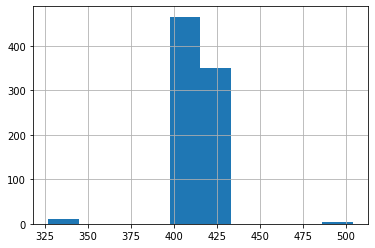

In [9]:
df["Full-flowering date"].hist(bins=10)

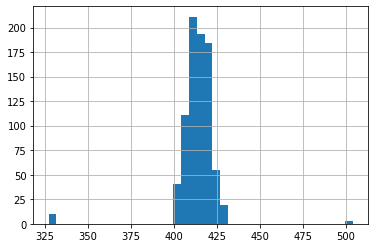

In [10]:
df["Full-flowering date"].hist(bins=39)

In [11]:
df["Full-flowering date (DOY)"].mean()

print(f'It takes an average of {df["Full-flowering date (DOY)"].mean(): .2f} days for the flowers to blossom')

It takes an average of  104.54 days for the flowers to blossom


In [12]:
print(f'The average days into the year flowers normally blossomed before 1900 is {df[df["AD"]<1900].mean()[2]:.2f}')


The average days into the year flowers normally blossomed before 1900 is 414.39


In [13]:
print(f'The average days into the year flowers normally blossomed after 1900 is {df[df["AD"]>1900].mean()[2]:.2f}')


The average days into the year flowers normally blossomed after 1900 is 409.45


In [30]:
df[df["Data type code"]=="title in Japanese poety"].count()[4]

39

In [34]:
df[df["Data type code"]=="title in Japanese poety"].AD

90       891
94       895
95       896
122      923
154      955
168      969
206     1007
232     1033
235     1036
259     1060
260     1061
283     1084
294     1095
381     1182
389     1190
400     1201
415     1216
418     1219
420     1221
422     1223
435     1236
464     1265
467     1268
468     1269
470     1271
488     1289
500     1301
523     1324
529     1330
646     1447
652     1453
653     1454
673     1474
733     1534
791     1592
839     1640
860     1661
1045    1846
1062    1863
Name: AD, dtype: int64

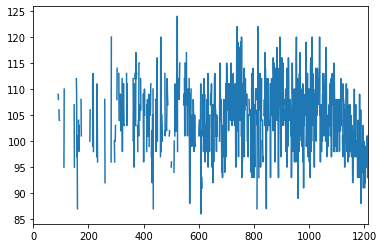

In [47]:
df['Full-flowering date (DOY)'].plot()

In [51]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

In [56]:
df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().plot(ylim=(80,120)

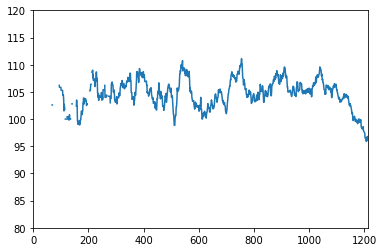

In [58]:
df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().plot(ylim=(80,120))

In [66]:
df.loc[(df['Full-flowering date'] > 300) & (df['Full-flowering date'] <400), 'month'] = 'March'

In [67]:
df.loc[(df['Full-flowering date'] > 400) & (df['Full-flowering date'] <500), 'month'] = 'April'

In [68]:
df.loc[(df['Full-flowering date'] > 500) & (df['Full-flowering date'] <600), 'month'] = 'May'

In [72]:
df[df['Full-flowering date'].isnull()==False]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,April
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,April
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,April


In [218]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

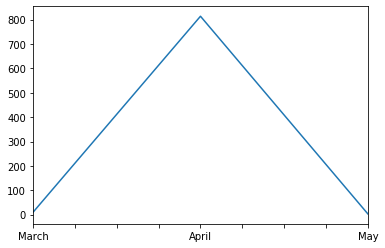

In [236]:
df.month.value_counts().reindex(["March", "April", "May"]).plot()

In [17]:
df['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int32

In [286]:
df["day_of_month"]=df['Full-flowering date'].dropna().astype(int).astype(str).str[1:3:1]

In [290]:
df["date"]=df["day_of_month"]+df["month"]

#### The End!